# Semana 5 onboarding LIPAI: preparação de dados

Usando dataset Wine  para avaliação das análise empregadas em nossa aula. O dataset podem ser baixados do site da UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets

In [120]:
import pandas as pd
from pandas.api.types import is_numeric_dtype
import seaborn as sns
import matplotlib.pyplot as plt

In [121]:
df = pd.read_csv("wine.data", sep=",")

# setar onome das colunas
df.columns = ["class", "alcohol", "malic_acid" , "ash", "alcalinity_of_ash", "magnesium", "total phenols", "flavanoids", "nonflavanoid_phenols","proanthocyanins", "color_intensity", "hue", "OD280/OD315_of_diluted_wines", "proline" ]

In [122]:
df.head()

,class,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,OD280/OD315_of_diluted_wines,proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


1) Escolha um novo dataset e construa um programa que calcule as medidas estatísticas. Procure usar as funções apresentadas nessa atividade, assim como, outras que estão disponíveis nas bibliotecas do Python

In [123]:
for col in df.columns:
    print(f"Coluna: {col} ")
    print(f"Media: {df[col].mean():.2f}")
    print(f"Mediana: {df[col].median():.2f}")

    print("Desvio padrão: %2.f " % df[col].std())
    print("Variancia: %2.f" % df[col].var())
    print("Minimo: %2.f" % df[col].min())
    print("Máximo: %2.f " % df[col].max())
    print("\n","*" * 20, "\n")

Coluna: class 
Media: 1.94
Mediana: 2.00
Desvio padrão:  1 
Variancia:  1
Minimo:  1
Máximo:  3 

 ******************** 

Coluna: alcohol 
Media: 12.99
Mediana: 13.05
Desvio padrão:  1 
Variancia:  1
Minimo: 11
Máximo: 15 

 ******************** 

Coluna: malic_acid 
Media: 2.34
Mediana: 1.87
Desvio padrão:  1 
Variancia:  1
Minimo:  1
Máximo:  6 

 ******************** 

Coluna: ash 
Media: 2.37
Mediana: 2.36
Desvio padrão:  0 
Variancia:  0
Minimo:  1
Máximo:  3 

 ******************** 

Coluna: alcalinity_of_ash 
Media: 19.52
Mediana: 19.50
Desvio padrão:  3 
Variancia: 11
Minimo: 11
Máximo: 30 

 ******************** 

Coluna: magnesium 
Media: 99.59
Mediana: 98.00
Desvio padrão: 14 
Variancia: 201
Minimo: 70
Máximo: 162 

 ******************** 

Coluna: total phenols 
Media: 2.29
Mediana: 2.35
Desvio padrão:  1 
Variancia:  0
Minimo:  1
Máximo:  4 

 ******************** 

Coluna: flavanoids 
Media: 2.02
Mediana: 2.13
Desvio padrão:  1 
Variancia:  1
Minimo:  0
Máximo:  5 

 *****

2) Use o dataset escolhido e mostre por meio das representações gráficas (histogramas) as principais características. Procure usar as funções apresentadas nesta atividade.


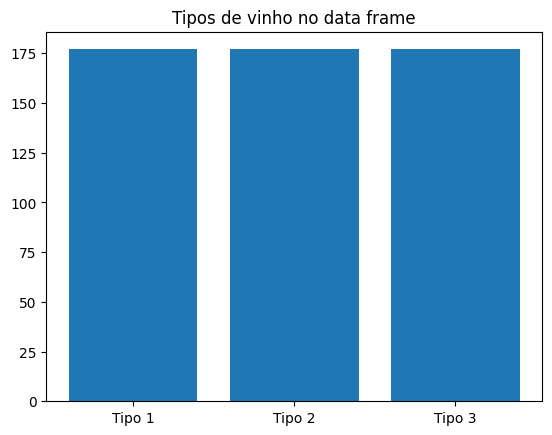

In [124]:
plt.title("Tipos de vinho no data frame")
labels = ["Tipo 1", "Tipo 2", "Tipo 3"]
tipo1 = (df["class"] == 1).count()
tipo2 = (df["class"] == 2).count()
tipo3 = (df["class"] == 3).count()

plt.bar(labels, [tipo1,tipo2,tipo3])
plt.show()
# Ambas as classes possuem a mesma quantidade de amostrar, 177

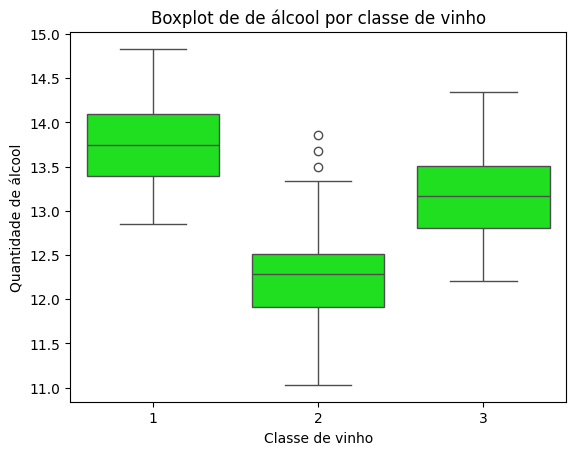

In [125]:
sns.boxplot(x='class', y='alcohol', data=df, color='lime')
plt.title('Boxplot de de álcool por classe de vinho')
plt.xlabel('Classe de vinho')
plt.ylabel('Quantidade de álcool')
plt.show()

3) O dataset Iris não possui valores ausentes. A base escolhida também pode conter todos os descritores por cada amostra. Use um dataset e sobre as amostras impute valores ausentes usando a média, mediana ou outras medidas.

In [126]:
# No data set escolhido não há dados ausentes
# Mas não seja por isso vamos fingir que tenha e tratar os casos 👍

# print( df.isnull() ) -> o resultado é False em toda a tabela
print("A quantidade de null na tabela, por coluna:\n", df.isnull().sum())
print("\nA quantidade de null na tabela é: ", df.isnull().sum().sum())

A quantidade de null na tabela, por coluna:
 class                           0
alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
OD280/OD315_of_diluted_wines    0
proline                         0
dtype: int64

A quantidade de null na tabela é:  0


In [127]:
# para cada coluna, se houver NaN colocar a média dos campos com valores válidos
for col in df.columns:
  if is_numeric_dtype( df[col] ):
    df[col].fillna( df[col].mean(), inplace=True)

/tmp/ipython-input-4106345574.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna( df[col].mean(), inplace=True)


4) Após aplicação das operações, faça a representação gráfica com histogramas das novas características dos dados analisados.

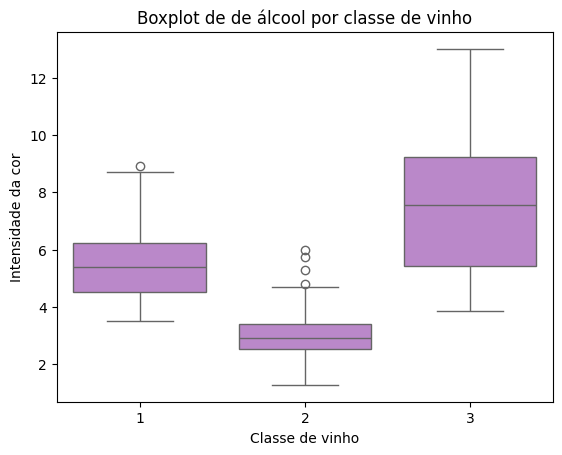

In [128]:
# vixi, pior q vai mudar nada

sns.boxplot(x='class', y='color_intensity', data=df, color='#c07dd4')
plt.title('Boxplot de de álcool por classe de vinho')
plt.xlabel('Classe de vinho')
plt.ylabel('Intensidade da cor')
plt.show()

<Axes: title={'center': 'Relação álcool e quantidade total de fenol'}, xlabel='alcohol', ylabel='total phenols'>

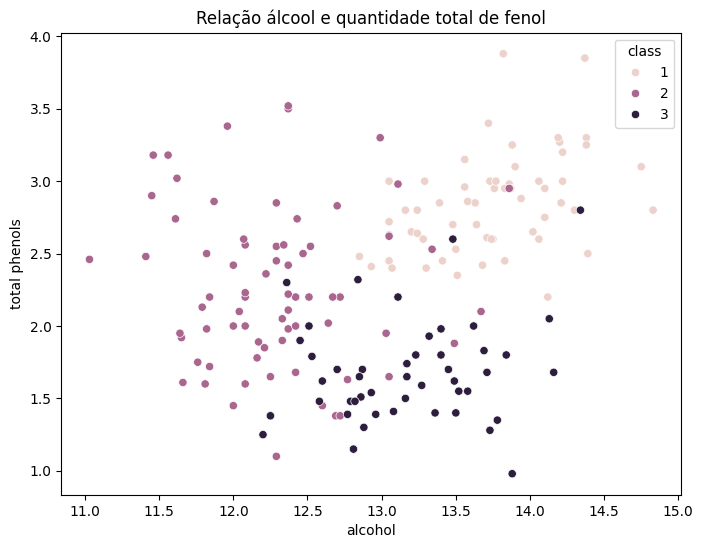

In [129]:
plt.figure(figsize=(8,6))
plt.title("Relação álcool e quantidade total de fenol")
sns.scatterplot(x='alcohol', y='total phenols', data=df, hue='class')

5) Compare os resultados obtidos usando um gráfico box plot. Que atributos possuem distribuições mais simétricas? Há a presença de valores extremos, denominados de outliers, para os atributos?


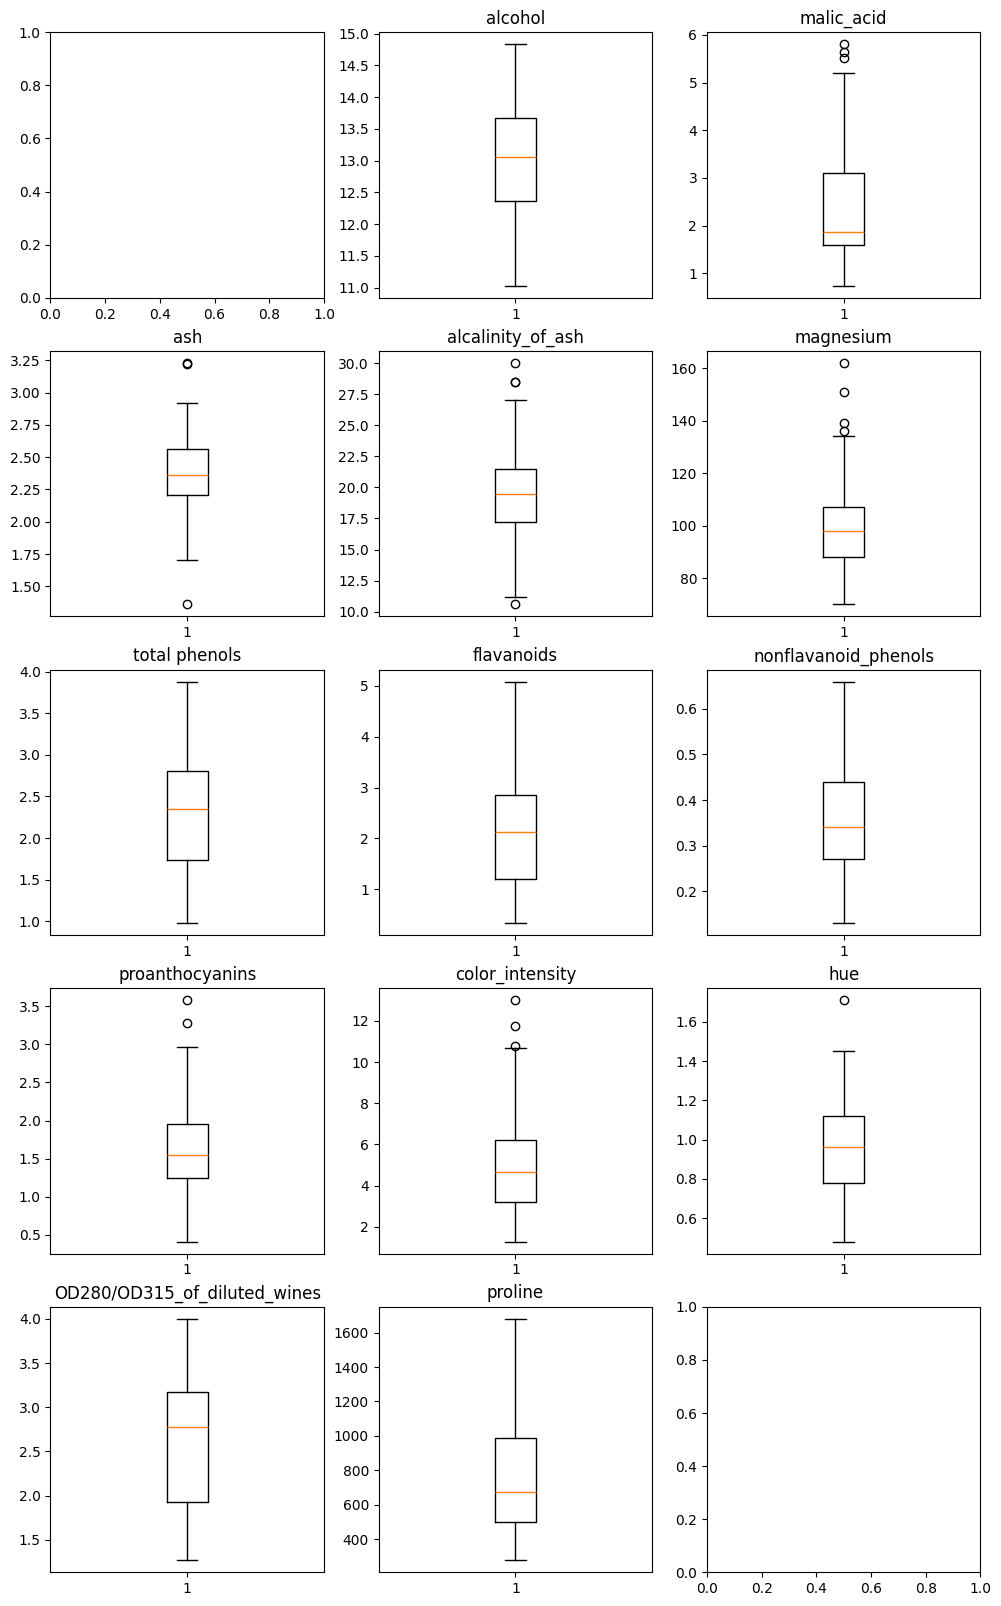

In [130]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(12,20))
axes = axes.flat
axes = list(axes)
axes.pop(0)
names = df.columns
names = list(names)
names.pop(0)
i = 0

for col in names:
    axes[i].set_title(names[i])
    axes[i].boxplot(df[col])
    i += 1

# O álcool aparenta ser o atributo mais simétrico.
# Há muitos outliers, principalmente em: alcalinity of ash, magnesium, color intensity

6) No dataset escolhido selecione intervalos de amostragem (10%, 30% e 50% - Progressiva) e faça análises sobre os dados em relação as métricas estatísticas. O que você pode observar sobre os subconjuntos em relação as métricas estatísticas com a nova composição dos dados?

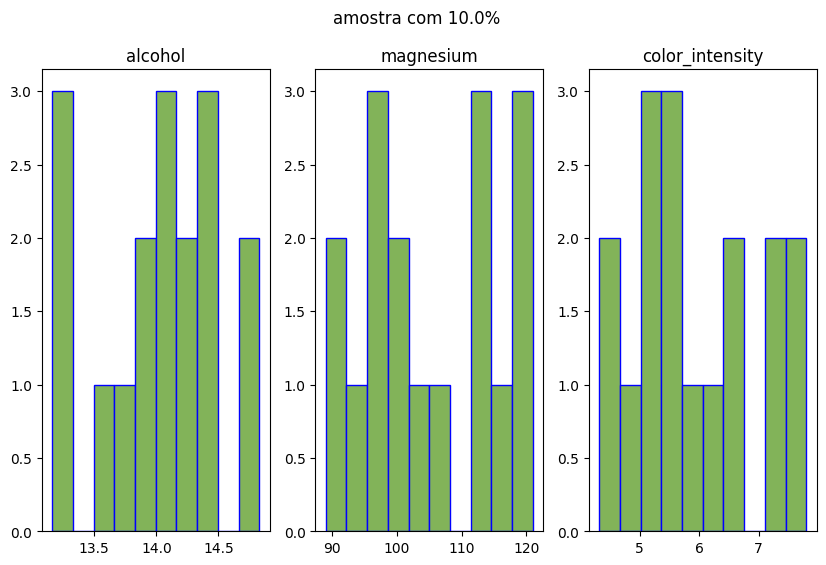

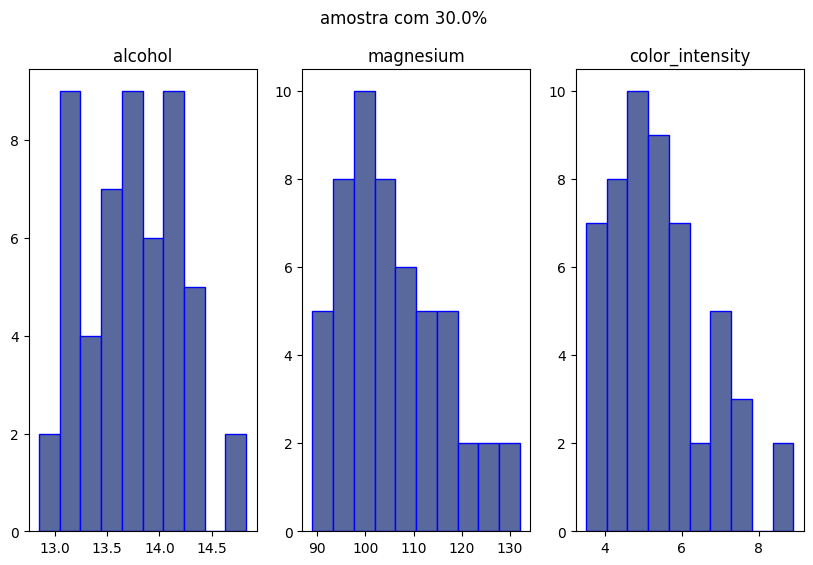

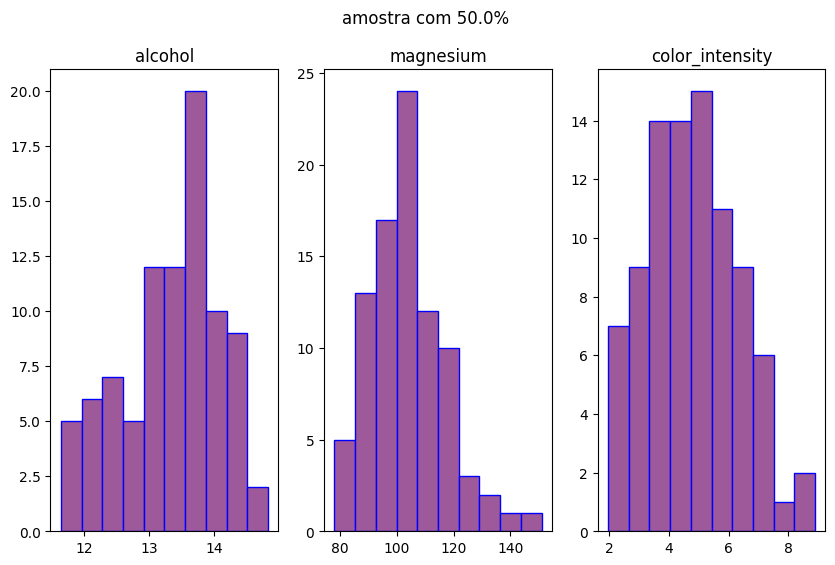

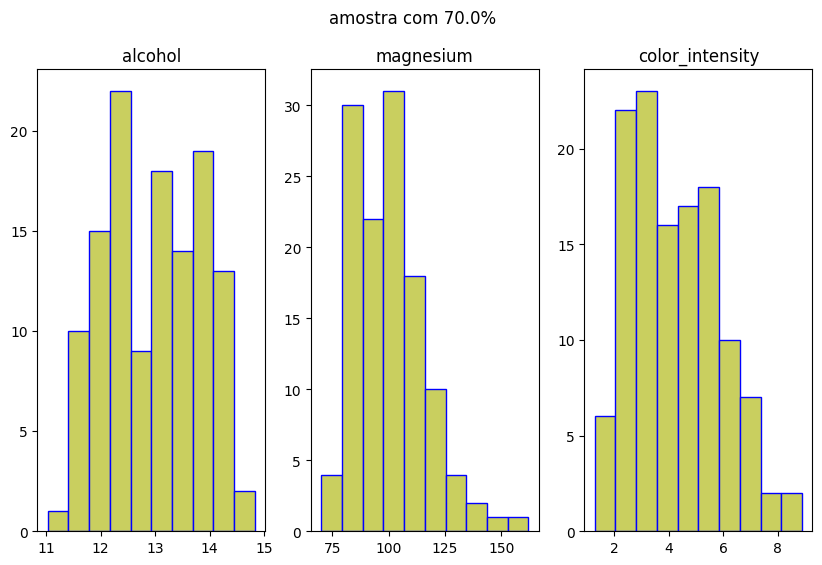

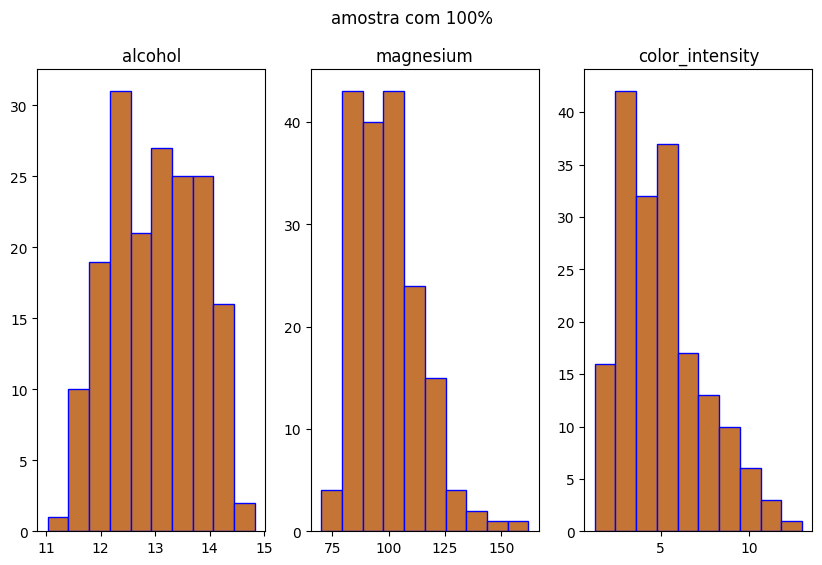

In [131]:
# Escolhendo álcool, magnésio e intensidade da cor como amostrar do todo, usar tudo deixa com informação demais, confuso.

labels = ['alcohol', 'magnesium', 'color_intensity']
colors = ['#82b359', '#59699e','#9e599b','#c9cf5f', '#c47535' ]
porc = [0.1, 0.3, 0.5, 0.7, 1]
df_ = df[labels]

for j, p in enumerate(porc):
  fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10,6))
  axes = list(axes)
  fig.suptitle(f"amostra com {p * 100}%")
  c = colors[j]

  for i, col in enumerate(labels):
    qnt  = df[col].count()
    size = int(qnt*p)
    data = df[col][:size]

    axes[i].hist(data, color=c, edgecolor='b')
    axes[i].set_title(col)

In [132]:

labels = ['alcohol', 'magnesium', 'color_intensity']
porc = [0.1, 0.3, 0.5, 0.7, 1]
df_ = df[labels]

for j, p in enumerate(porc):
  print('='*5, f'Análise com {p*100}% dos dados', '='*5)

  for i, col in enumerate(labels):
    qnt  = df[col].count()
    size = int(qnt*p)
    data = df[col][:size]
    print(f"Coluna: {col} Media: {data.mean():.2f} Mediana: {data.median():.2f} Desvio padrão: %2.f " % data.std())
  print()

# É perceptível que quanto mais dados usamos para verificar as medidas mais próximo se chega do dado exato no dataset
# Para um treinamento que seja mais eficiente e siga o mais próximo possível da base da dados é vantajoso treina-lo
# com o maior número possível de dados que representem a realidade que ele deve entender

===== Análise com 10.0% dos dados =====
Coluna: alcohol Media: 14.01 Mediana: 14.10 Desvio padrão:  1 
Coluna: magnesium Media: 105.00 Mediana: 102.00 Desvio padrão: 10 
Coluna: color_intensity Media: 5.94 Mediana: 5.68 Desvio padrão:  1 

===== Análise com 30.0% dos dados =====
Coluna: alcohol Media: 13.74 Mediana: 13.76 Desvio padrão:  0 
Coluna: magnesium Media: 105.38 Mediana: 103.00 Desvio padrão: 10 
Coluna: color_intensity Media: 5.46 Mediana: 5.24 Desvio padrão:  1 

===== Análise com 50.0% dos dados =====
Coluna: alcohol Media: 13.31 Mediana: 13.48 Desvio padrão:  1 
Coluna: magnesium Media: 103.11 Mediana: 101.00 Desvio padrão: 14 
Coluna: color_intensity Media: 4.82 Mediana: 4.75 Desvio padrão:  2 

===== Análise com 70.0% dos dados =====
Coluna: alcohol Media: 12.98 Mediana: 13.05 Desvio padrão:  1 
Coluna: magnesium Media: 100.38 Mediana: 98.00 Desvio padrão: 15 
Coluna: color_intensity Media: 4.25 Mediana: 3.93 Desvio padrão:  2 

===== Análise com 100% dos dados =====
Co